In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from operator import itemgetter

root_path = '/data/Project_1_cataract/xzx/pregnant/data'
rda_path = os.path.join(root_path, 'rda')
original_path = os.path.join(root_path, 'original_csv')
input_set_123_path = os.path.join(root_path, 'input_set_123')
bishe_path = os.path.join(root_path, 'bishe_data')
 

# 设置完整显示所有行列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv(os.path.join(bishe_path, 'train.csv'), low_memory=False)
# df = pd.read_csv(os.path.join(original_path, 'highrisk.csv'), low_memory=False)

df.shape

(1554894, 177)

In [2]:
df.columns

Index(['xth_child', '文化程度', '职业', '服用叶酸', '全面两孩', '单独两孩', '痛经', '婚龄', '母亲健康状况',
       '月经颜色',
       ...
       'c', 'SGA_S1', 'LGA_S1', 'low_BW', 'macrosomia', 'premature',
       'foetal_death', 'stillbirth', 'death_7days', 'malformation'],
      dtype='object', length=177)

In [3]:
df.head()

,xth_child,文化程度,职业,服用叶酸,全面两孩,单独两孩,痛经,婚龄,母亲健康状况,月经颜色,月经量,月经血块,父亲民族,母亲民族,edu_high_mo,edu_low_mo,nation_han_mo,nation_han_fa,age_mo,age_fa,work,lmp,health_mo,bmi_mo,ob_mo,ow_mo,thin_mo,首检日期,孕产期,检查孕周,孕次,产次,早孕反应,病毒感染,孕期服药,营养,发育,弓形体,巨细胞病毒,风疹病毒,单纯疱疹病毒,自然流产,人工流产,死胎次数,死产数,新生儿死亡,出生缺陷儿,血糖,血红蛋白,尿蛋白,尿糖,尿酮体,血清谷丙转氨酶,血清谷草转氨酶,白蛋白,总胆红素,结合胆红素,血清肌酐,血尿素氮,初次妊娠,经产妇,height_first,weight_first,sbp,dbp,highrisk_3胎及以上,highrisk_ABO溶血症,highrisk_BMI小于18.5或BMI大于等于24,highrisk_BMI大于等于28,highrisk_ICP合并肝功能损害,highrisk_Rh溶血症,highrisk_中枢性尿崩症伴有明显的多饮烦渴、多尿症状，或者合并其他垂体功能异常,highrisk_主动或被动吸烟,highrisk_主动脉疾病,highrisk_产前出血,highrisk_产后抑郁、产褥期中暑、产褥感染,highrisk_仅需药物治疗的肝硬化、肠梗阻、消化道出血等,highrisk_先兆早产,highrisk_免疫系统疾病活动期,highrisk_其他医生认为具有严重高危因素,highrisk_其他医生认为具有较重高危因素,highrisk_其他医生认为的一般危险因素,highrisk_再生障碍性贫血,highrisk_凝血功能障碍,highrisk_凶险性前置胎盘、胎盘早剥,highrisk_前置胎盘,highrisk_原因不明的发热,highrisk_原因不明的肝功能异常,highrisk_双胎,highrisk_吸毒,highrisk_吸毒史,highrisk_呼吸系统疾病，肺功能正常,highrisk_呼吸系统疾病：哮喘反复发作、肺纤维化,highrisk_哮喘,highrisk_围产儿死亡史、出生缺陷、滋养细胞疾病,highrisk_妊娠合并传染性疾病,highrisk_妊娠期肝内胆汁淤积症ICP,highrisk_婴儿未存活，畸形儿,highrisk_子痫，先兆子痫,highrisk_宫高小于第10百分位,highrisk_宫高小于第5百分位,highrisk_宫高为第10百分位左右,highrisk_尖锐湿疣、淋病等性传播疾病,highrisk_巨大儿,highrisk_年龄小于等于18岁大于等于35岁,highrisk_年龄大于等于30岁且结婚2年不孕,highrisk_年龄大于等于40岁,highrisk_应用小剂量激素6个月以上，无临床活动表现的免疫疾病,highrisk_异位妊娠史,highrisk_心肌炎后遗症，心律失常,highrisk_心脏瓣膜病,highrisk_心脏疾病,highrisk_心脏病,highrisk_急性肝炎或慢性肝炎,highrisk_恶性肿瘤治疗后无转移复发,highrisk_恶性肿瘤治疗后转移、复发,highrisk_文盲,highrisk_无产前检查,highrisk_无合并症的肺动脉狭窄和二尖瓣脱垂,highrisk_无需药物治疗的免疫系统疾病,highrisk_无需药物治疗的甲亢、糖尿病、垂体泌乳素瘤,highrisk_早孕期接触农药或放射物质,highrisk_易栓症,highrisk_智力障碍或精神疾病缓解,highrisk_流产大于等于2次,highrisk_生殖道畸形,highrisk_甲亢并发心脏病、感染、肝功能异常、精神异常等,highrisk_甲减引起相应系统功能障碍，基础代谢率＜-50%,highrisk_疤痕子宫、子宫肌瘤或卵巢囊肿大于等于5cm,highrisk_瘢痕子宫伴中央性前置胎盘或伴有可疑胎盘植入,highrisk_瘢痕子宫（距末次子宫手术间隔小于18月）,highrisk_白血病,highrisk_盆腔手术史,highrisk_神经系统疾病：癫痫全身发作、重症肌无力（病变发展至延脑肌、肢带肌、躯干肌和呼吸肌）,highrisk_神经系统疾病：癫痫单纯部分发作、重症肌无力（眼肌型）,highrisk_神经系统疾病：癫痫失神发作、重症肌无力（病变波及四肢骨骼和延脑部肌肉）,highrisk_精神疾病急性期,highrisk_糖尿病并发肾病V级，严重心血管病、增生性视网膜病变或玻璃体出血、周围神经病变等,highrisk_羊水过多或过少,highrisk_肝炎病毒携带者，肝功能异常,highrisk_肝硬化失代偿、严重消化道出血、急性胰腺炎、肠梗阻等,highrisk_肺动脉高压,highrisk_肾性尿崩症,highrisk_肾脏疾病肾功能不全,highrisk_肾脏疾病肾功能正常,highrisk_胎位不正,highrisk_胎儿宫内生长受限,highrisk_胎动小于10次/分,highrisk_胎动消失,highrisk_胎膜早破,highrisk_胸廓或脊柱畸形影响肺功能,highrisk_胸廓畸形,highrisk_脊柱侧弯,highrisk_脑血管畸形及手术史,highrisk_血小板小于50万,highrisk_血小板减小但无出血倾向,highrisk_血栓栓塞性疾病,highrisk_贫血,highrisk_身高小于等于145cm,highrisk_辅助生殖,highrisk_过期妊娠,highrisk_过期妊娠伴胎盘功能下降,highrisk_重度贫血,highrisk_重症肝炎,highrisk_需药物治疗的甲亢、糖尿病、垂体泌乳素瘤,highrisk_骨盆狭小,highrisk_高血压,c,SGA_S1,LGA_S1,low_BW,macrosomia,premature,foetal_death,stillbirth,death_7days,malformation
0,1,0.160266,0.028385,0.047390,0.593837,0.377961,0.664527,-1.0,0.261752,0.267961,0.730344,0.654382,0,0,1.0,0.0,1.0,1.0,26.0,22.0,1.0,1612310400,0.0,26.562500,0.0,1.0,0.0,1635033600,1636502400,263.0,3.0,0.0,0.262956,0.788759,0.659444,0.205972,0.852008,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.630783,-1.0,-1.0,-1.0,-1.0,22.35726,21.356239,43.389567,11.446647,4.112678,47.740622,3.010052,1.0,0.0,160.000000,68.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
1,1,0.271033,0.400782,0.218345,0.236631,0.377961,0.664527,26.0,0.736686,0.267961,0.730344,0.654382,0,0,0.0,0.0,1.0,1.0,32.0,31.0,0.0,1402012800,1.0,18.195483,0.0,0.0,1.0,1406073600,1426204800,47.0,3.0,1.0,0.664978,0.063355,0.659444,0.205972,0.852008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.630783,-1.0,-1.0,-1.0,-1.0,22.35726,21.356239,43.389567,11.446647,4.112678,47.740622,3.010052,1.0,1.0,159.000000,46.000000,103.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## NAN Search

In [4]:
nans_df = df.isna()
nans_groups={}
for col in df.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()
nans_groups = sorted(nans_groups.items(), key=itemgetter(0), reverse=True)
for k,v in nans_groups:
    print('####### NAN count =',k, 'share =', k / len(df))
    print(v)

####### NAN count = 0 share = 0.0
['xth_child', '文化程度', '职业', '服用叶酸', '全面两孩', '单独两孩', '痛经', '婚龄', '母亲健康状况', '月经颜色', '月经量', '月经血块', '父亲民族', '母亲民族', 'edu_high_mo', 'edu_low_mo', 'nation_han_mo', 'nation_han_fa', 'age_mo', 'age_fa', 'work', 'lmp', 'health_mo', 'bmi_mo', 'ob_mo', 'ow_mo', 'thin_mo', '首检日期', '孕产期', '检查孕周', '孕次', '产次', '早孕反应', '病毒感染', '孕期服药', '营养', '发育', '弓形体', '巨细胞病毒', '风疹病毒', '单纯疱疹病毒', '自然流产', '人工流产', '死胎次数', '死产数', '新生儿死亡', '出生缺陷儿', '血糖', '血红蛋白', '尿蛋白', '尿糖', '尿酮体', '血清谷丙转氨酶', '血清谷草转氨酶', '白蛋白', '总胆红素', '结合胆红素', '血清肌酐', '血尿素氮', '初次妊娠', '经产妇', 'height_first', 'weight_first', 'sbp', 'dbp', 'highrisk_3胎及以上', 'highrisk_ABO溶血症', 'highrisk_BMI小于18.5或BMI大于等于24', 'highrisk_BMI大于等于28', 'highrisk_ICP合并肝功能损害', 'highrisk_Rh溶血症', 'highrisk_中枢性尿崩症伴有明显的多饮烦渴、多尿症状，或者合并其他垂体功能异常', 'highrisk_主动或被动吸烟', 'highrisk_主动脉疾病', 'highrisk_产前出血', 'highrisk_产后抑郁、产褥期中暑、产褥感染', 'highrisk_仅需药物治疗的肝硬化、肠梗阻、消化道出血等', 'highrisk_先兆早产', 'highrisk_免疫系统疾病活动期', 'highrisk_其他医生认为具有严重高危因素', 'highrisk_其他医生认为具有较重高危因素', 'hig

In [5]:
df.shape

(1554894, 177)

In [6]:
# 绘制直方图
def make_histplot(df, column_name):
    # 绘制直方图
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column_name, bins=1000)
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.show()

In [7]:
# 离散值EDA
def eda_discrete(name):
    print('*' * 10)
    print(f'{name} EDA')
    for c_name, count in df[name].value_counts().sort_values(ascending=False).items():
        print(f'class: {c_name}, \tshare: {count / len(df)}, \tnum: {count}')
    nan_num = df[name].isna().sum()
    print(f'NAA count = {nan_num}, share = {nan_num / len(df)}')
    print('#' * 10)

cols = ['xth_child', '文化程度', '职业', '服用叶酸', '全面两孩', '单独两孩', '痛经',
       '母亲健康状况', '月经颜色', '月经量', '月经血块', '父亲民族', '母亲民族', 'edu_high_mo','edu_low_mo', 'nation_han_mo', 
       'nation_han_fa', 'work', 'health_mo', 'ob_mo',
       'ow_mo', 'thin_mo', '早孕反应', '病毒感染',
       '孕期服药', '营养', '发育', '弓形体', '巨细胞病毒', '风疹病毒', 
       '单纯疱疹病毒', '自然流产', '人工流产',
       '死胎次数', '死产数', '新生儿死亡', '出生缺陷儿', '尿蛋白', '尿糖', '尿酮体',
       '初次妊娠', '经产妇', 'SGA_S1',
       'LGA_S1', 'low_BW', 'macrosomia', 'premature', 'foetal_death',
       'stillbirth', 'death_7days', 'malformation']
for col in cols:
    eda_discrete(col)

**********
xth_child EDA
class: 1, 	share: 0.9850433534375976, 	num: 1531638
class: 2, 	share: 0.014883972798145725, 	num: 23143
class: 3, 	share: 7.267376425659884e-05, 	num: 113
NAA count = 0, share = 0.0
##########
**********
文化程度 EDA
class: 0.27103263, 	share: 0.271032623445714, 	num: 421427
class: 0.19532715, 	share: 0.1953271412713664, 	num: 303713
class: 0.16026558, 	share: 0.16026558723617174, 	num: 249196
class: 0.14029638, 	share: 0.1402963803320355, 	num: 218146
class: 0.12958182, 	share: 0.1295818235841157, 	num: 201486
class: 0.06342555, 	share: 0.06342554540695379, 	num: 98620
class: 0.022056809, 	share: 0.022056809017206316, 	num: 34296
class: 0.012195687, 	share: 0.012195686651308707, 	num: 18963
class: 0.00434692, 	share: 0.004346920111596032, 	num: 6759
class: 0.0014714829, 	share: 0.001471482943531842, 	num: 2288
NAA count = 0, share = 0.0
##########
**********
职业 EDA
class: 0.40078166, 	share: 0.4007816610006856, 	num: 623173
class: 0.19779804, 	share: 0.19779804925

NAA count = 0, share = 0.0
##########
**********
父亲民族 EDA
class: 0, 	share: 0.8385163232992088, 	num: 1303804
class: 1, 	share: 0.13411653784759603, 	num: 208537
class: 2, 	share: 0.011850325488425578, 	num: 18426
class: 3, 	share: 0.003955896672056101, 	num: 6151
class: 5, 	share: 0.0022245889430404903, 	num: 3459
class: 6, 	share: 0.0021679934452123423, 	num: 3371
class: 4, 	share: 0.001967336680185273, 	num: 3059
class: 10, 	share: 0.001274041831790463, 	num: 1981
class: 7, 	share: 0.0011023259463346054, 	num: 1714
class: 9, 	share: 0.0005730294155099962, 	num: 891
class: 17, 	share: 0.000493924344682017, 	num: 768
class: 12, 	share: 0.0002939107103120856, 	num: 457
class: 19, 	share: 0.00021287624751269217, 	num: 331
class: 20, 	share: 0.00020065676502706937, 	num: 312
class: 11, 	share: 0.00015370822705599224, 	num: 239
class: 16, 	share: 0.00013441430734185096, 	num: 209
class: 13, 	share: 0.00012669673945619445, 	num: 197
class: 28, 	share: 8.682263871363579e-05, 	num: 135
class

In [8]:
# 连续值EDA
pd.set_option('display.float_format', lambda x: '{:.7g}'.format(x))
cols = ['bmi_mo', '血糖', '血红蛋白', '血清谷丙转氨酶', '血清谷草转氨酶', '白蛋白', '总胆红素', '结合胆红素', '血清肌酐', '血尿素氮', 'height_first', 'weight_first', '婚龄', 'age_mo', 'age_fa', 'sbp', 'dbp', '检查孕周', '孕次', '产次']
eda_continuous = pd.DataFrame(columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'nuique', 'NANs', 'NANs share'])
for name in cols:
    nan_num = df[name].isna().sum()
    eda_continuous.loc[name] = {
        'mean': df[name].mean(), 
        'std': df[name].var(), 
        'min': df[name].min(), 
        '25%': df[name].quantile(0.25), 
        '50%': df[name].quantile(0.50), 
        '75%': df[name].quantile(0.75), 
        'max': df[name].max(), 
        'nuique': df[name].nunique(), 
        'NANs': nan_num, 
        'NANs share': nan_num / len(df)
    }
eda_continuous = eda_continuous.T
eda_continuous

,bmi_mo,血糖,血红蛋白,血清谷丙转氨酶,血清谷草转氨酶,白蛋白,总胆红素,结合胆红素,血清肌酐,血尿素氮,height_first,weight_first,婚龄,age_mo,age_fa,sbp,dbp,检查孕周,孕次,产次
mean,21.6524,4.630783,30.0422,22.35726,21.35624,43.38957,11.44665,4.112678,47.74062,3.010052,159.0165,54.76017,10.23883,24.51592,25.95919,89.86566,56.58486,85.10731,2.158388,0.4142315
std,11.05909,0.06715783,2962.421,73.17914,27.73058,3.378994,5.221156,1.573476,23.55722,0.1392367,24.51322,76.63765,128.093,115.3443,141.3555,1719.946,726.2259,1775.886,1.80745,0.306202
min,10.85396,3,-1,0,0,15,0,0,30,1,100,30,-1,-1,-1,-1,-1,-1,1,0
25%,19.43301,4.630783,-1,22.35726,21.35624,43.38957,11.44665,4.112678,47.74062,3.010052,156,49,0,23,25,95,59,66,1,0
50%,21.12029,4.630783,-1,22.35726,21.35624,43.38957,11.44665,4.112678,47.74062,3.010052,159,53.8,4,27,29,104,65,83,2,0
75%,23.32752,4.630783,-1,22.35726,21.35624,43.38957,11.44665,4.112678,47.74062,3.010052,162,60,22,31,33,113,72,91,3,1
max,124.5015,20,249,901,821,100,99,95,150,15,198.5,140,35,50,50,255,147,294,20,10
nuique,32233,797,261,4941,3575,2267,3256,1699,4212,828,444,769,37,37,37,140,91,296,19,11
NANs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NANs share,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 首检日期

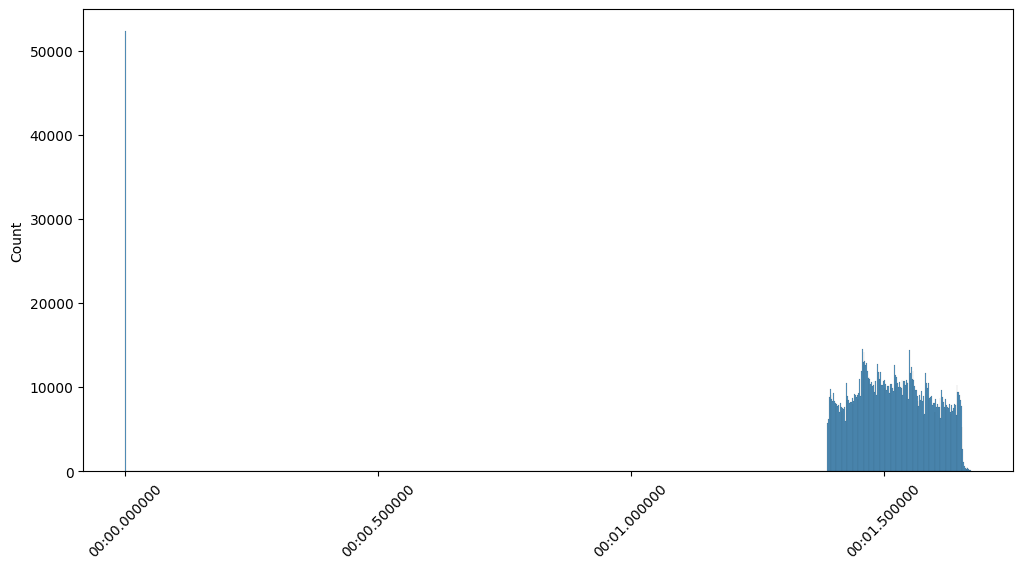

In [9]:
df['首检日期'] = pd.to_datetime(df['首检日期'])
make_histplot(df, '首检日期')

## 孕产期

In [10]:
time_cols = ['lmp', '首检日期', '孕产期', '分娩时间']
for col in time_cols:
    print('*' * 10)
    print(f'{col} EDA')
    df[col] = pd.to_datetime(df[col])
    year = df[col].dt.year.value_counts().sort_values(ascending=False)
    for y, count in year.items():
        print(f'{y}: \t {count}')
    print('#' * 10)

**********
lmp EDA
1970: 	 1346962
1969: 	 207932
##########
**********
首检日期 EDA
1970: 	 1502539
1969: 	 52355
##########
**********
孕产期 EDA
1970: 	 1494380
1969: 	 60514
##########
**********
分娩时间 EDA


KeyError: '分娩时间'

In [ ]:
# 相关性分析
# 字符量简单编码
def encode_FE(df_train, cols):
    for col in cols:
        vc = df_train[col].value_counts(dropna=True, normalize=True).to_dict()
        df_train[col] = df_train[col].map(vc)
        df_train[col] = df_train[col].astype('float32')


encode_FE(df, ['母亲ID', '文化程度', '职业', '服用叶酸', '全面两孩', '单独两孩', '痛经', '母亲健康状况', '月经颜色', '月经量', '月经血块', '父亲民族', '母亲民族', '早孕反应', '病毒感染', '孕期服药', '营养', '发育'])
encode_times = ['lmp', '首检日期', '孕产期', '分娩时间']
for encode_time in encode_times:
    df[encode_time] = pd.to_datetime(df[encode_time]).astype(int) // 10**9
correlations = df.corr(numeric_only=True)

for column in df.columns:
    column_correlations = correlations[column].sort_values(ascending=False)
    top_20_correlations = column_correlations[1:21]  # Exclude self-correlation
    print(f"Top 20 correlations for {column}:")
    for correlated_column, correlation in top_20_correlations.iteritems():
        print(f"{correlated_column}: {correlation}")
    print()

Top 20 correlations for 母亲ID:
c: 0.9879484017406572
highrisk_双胎: 0.7762000192417589
xth_child: 0.7018412349104628
low_BW: 0.41055640152547346
premature: 0.3527313042943034
highrisk_辅助生殖: 0.28966388232701495
highrisk_3胎及以上: 0.10398719090270729
SGA_S1: 0.08885917569053571
age_mo: 0.056543167655565316
age_fa: 0.049442505192660635
全面两孩: 0.049256527082463544
highrisk_盆腔手术史: 0.04383938283631672
血清谷丙转氨酶: 0.03685226046726146
分娩时间: 0.03252976823996273
weight_first: 0.03235592115173398
血清谷草转氨酶: 0.032050226937438545
highrisk_其他医生认为的一般危险因素: 0.031422334450626574
bmi_mo: 0.028566640026975225
sbp: 0.028250908798637
单独两孩: 0.028152190638623644

Top 20 correlations for xth_child:
母亲ID: 0.7018412349104628
c: 0.6934401883226615
highrisk_双胎: 0.5448506590762132
low_BW: 0.3041151169283644
premature: 0.24761499171628465
highrisk_辅助生殖: 0.2032674130384347
SGA_S1: 0.08280812850570578
highrisk_3胎及以上: 0.07297882830592639
age_mo: 0.03961014934531274
age_fa: 0.034658283892382166
全面两孩: 0.03382655639456333
highrisk_盆腔

/tmp/ipykernel_3194947/990563929.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for correlated_column, correlation in top_20_correlations.iteritems():
